In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
import scipy.stats as stats

In [14]:
df=pd.read_csv("D:\MINI_Project\DoAn3\Data\Students_Grading_Dataset.csv")
# Display head of the dataset
print("Head of the dataset:")
df.head()

Head of the dataset:


<>:1: SyntaxWarning: invalid escape sequence '\M'
<>:1: SyntaxWarning: invalid escape sequence '\M'
C:\Users\Admin\AppData\Local\Temp\ipykernel_20072\3425647870.py:1: SyntaxWarning: invalid escape sequence '\M'
  df=pd.read_csv("D:\MINI_Project\DoAn3\Data\Students_Grading_Dataset.csv")


,Student_ID,First_Name,Last_Name,Email,Gender,Age,Department,Attendance (%),Midterm_Score,Final_Score,...,Projects_Score,Total_Score,Grade,Study_Hours_per_Week,Extracurricular_Activities,Internet_Access_at_Home,Parent_Education_Level,Family_Income_Level,Stress_Level (1-10),Sleep_Hours_per_Night
0,S1000,Omar,Williams,student0@university.com,Female,22,Mathematics,97.36,40.61,59.61,...,62.84,83.49,C,10.3,Yes,No,Master's,Medium,1,5.9
1,S1001,Maria,Brown,student1@university.com,Male,18,Business,97.71,57.27,74.00,...,98.23,92.29,F,27.1,No,No,High School,Low,4,4.3
2,S1002,Ahmed,Jones,student2@university.com,Male,24,Engineering,99.52,41.84,63.85,...,91.22,93.55,F,12.4,Yes,No,High School,Low,9,6.1
3,S1003,Omar,Williams,student3@university.com,Female,24,Engineering,90.38,45.65,44.44,...,55.48,51.03,A,25.5,No,Yes,High School,Low,8,4.9
4,S1004,John,Smith,student4@university.com,Female,23,CS,59.41,53.13,61.77,...,87.43,90.91,A,13.3,Yes,No,Master's,Medium,6,4.5


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Student_ID                  5000 non-null   object 
 1   First_Name                  5000 non-null   object 
 2   Last_Name                   5000 non-null   object 
 3   Email                       5000 non-null   object 
 4   Gender                      5000 non-null   object 
 5   Age                         5000 non-null   int64  
 6   Department                  5000 non-null   object 
 7   Attendance (%)              5000 non-null   float64
 8   Midterm_Score               5000 non-null   float64
 9   Final_Score                 5000 non-null   float64
 10  Assignments_Avg             5000 non-null   float64
 11  Quizzes_Avg                 5000 non-null   float64
 12  Participation_Score         5000 non-null   float64
 13  Projects_Score              5000 

# Data Cleaning & Data Pre-Processing

In [16]:
# Count the null values in each column
null_values = df.isnull().sum()

# Check for duplicate rows
duplicate_rows = df.duplicated().sum()

# Return results
null_values, duplicate_rows

(Student_ID                       0
 First_Name                       0
 Last_Name                        0
 Email                            0
 Gender                           0
 Age                              0
 Department                       0
 Attendance (%)                   0
 Midterm_Score                    0
 Final_Score                      0
 Assignments_Avg                  0
 Quizzes_Avg                      0
 Participation_Score              0
 Projects_Score                   0
 Total_Score                      0
 Grade                            0
 Study_Hours_per_Week             0
 Extracurricular_Activities       0
 Internet_Access_at_Home          0
 Parent_Education_Level        1025
 Family_Income_Level              0
 Stress_Level (1-10)              0
 Sleep_Hours_per_Night            0
 dtype: int64,
 np.int64(0))

In [17]:
# Handling Missing Values
df.fillna({
    'Attendance (%)': df['Attendance (%)'].mean(),  # Fill missing Attendance (%) with mean
    'Assignments_Avg': df['Assignments_Avg'].median(),  # Fill missing Assignments_Avg with median
    'Parent_Education_Level': "Not Reported"  # Fill missing Parent_Education_Level with 'Not Reported'
}, inplace=True)

# Display sample rows to verify changes
print("\nSample of cleaned data:")
print(df[['Assignments_Avg', 'Parent_Education_Level', 'Attendance (%)']].sample(10))

# Check the data types after cleaning
print("\nData types after cleaning:")
print(df[['Assignments_Avg', 'Parent_Education_Level', 'Attendance (%)']].dtypes)


Sample of cleaned data:
      Assignments_Avg Parent_Education_Level  Attendance (%)
1774            68.86            High School           52.90
1223            54.14            High School           72.06
2641            98.16           Not Reported           69.51
3226            77.11               Master's           97.91
1370            96.22             Bachelor's           79.64
1455            73.13             Bachelor's           53.96
4709            78.35                    PhD           88.28
444             66.19               Master's           58.52
4638            77.77               Master's           67.95
925             97.31           Not Reported           77.31

Data types after cleaning:
Assignments_Avg           float64
Parent_Education_Level     object
Attendance (%)            float64
dtype: object


In [18]:
unique_first_names = df['First_Name'].unique()
print("Unique first names in the dataset:")
print(unique_first_names)

Unique first names in the dataset:
['Omar' 'Maria' 'Ahmed' 'John' 'Liam' 'Sara' 'Emma' 'Ali']


In [19]:
name_gender_mapping = {
    'Omar': 'Male',
    'Maria': 'Female',
    'Ahmed': 'Male',
    'John': 'Male',
    'Liam': 'Male',
    'Sara': 'Female',
    'Emma': 'Female',
    'Ali': 'Male'
}

# Identify outliers (rows where gender does not match expected gender from first name)
df['Correct_Gender'] = df['First_Name'].map(name_gender_mapping)
outliers = df[df['Gender'] != df['Correct_Gender']]

# Print the number of mismatches
print(f"Number of gender mismatches: {len(outliers)}")

# Correct the gender values
df.loc[df['Gender'] != df['Correct_Gender'], 'Gender'] = df['Correct_Gender']

# Drop the temporary 'Correct_Gender' column
df.drop(columns=['Correct_Gender'], inplace=True)

Number of gender mismatches: 2558


In [20]:
duplicate_students = df[df.duplicated(subset=['Student_ID'], keep=False)]

# Print the number of duplicate entries
print(f"Number of duplicate Student_IDs: {len(duplicate_students)}")

# Remove duplicates, keeping the first occurrence
df.drop_duplicates(subset=['Student_ID'], keep='first', inplace=True)

# Verify removal
print(f"Dataset after duplicate removal: {df.shape[0]} records")

Number of duplicate Student_IDs: 0
Dataset after duplicate removal: 5000 records


In [21]:
df_cleaned = df.drop(columns=['Student_ID', 'First_Name', 'Last_Name', 'Email'])

# Display the first few rows to verify the changes
df_cleaned.head()

,Gender,Age,Department,Attendance (%),Midterm_Score,Final_Score,Assignments_Avg,Quizzes_Avg,Participation_Score,Projects_Score,Total_Score,Grade,Study_Hours_per_Week,Extracurricular_Activities,Internet_Access_at_Home,Parent_Education_Level,Family_Income_Level,Stress_Level (1-10),Sleep_Hours_per_Night
0,Male,22,Mathematics,97.36,40.61,59.61,73.69,53.17,7.34,62.84,83.49,C,10.3,Yes,No,Master's,Medium,1,5.9
1,Female,18,Business,97.71,57.27,74.00,74.23,98.23,8.80,98.23,92.29,F,27.1,No,No,High School,Low,4,4.3
2,Male,24,Engineering,99.52,41.84,63.85,85.85,50.00,0.47,91.22,93.55,F,12.4,Yes,No,High School,Low,9,6.1
3,Male,24,Engineering,90.38,45.65,44.44,68.10,66.27,0.42,55.48,51.03,A,25.5,No,Yes,High School,Low,8,4.9
4,Male,23,CS,59.41,53.13,61.77,67.66,83.98,6.43,87.43,90.91,A,13.3,Yes,No,Master's,Medium,6,4.5


In [22]:
categorical_columns = ['Gender', 'Family_Income_Level', 'Internet_Access_at_Home', 'Extracurricular_Activities']

for col in categorical_columns:
    print(f"Unique values in {col}: {df[col].unique()}")

# Standardize values (example for Gender)
df['Gender'] = df['Gender'].replace({'M': 'Male', 'F': 'Female'})  # If needed

# Ensure only valid categories exist
valid_categories = {
    'Gender': ['Male', 'Female'],
    'Family_Income_Level': ['Low', 'Medium', 'High'],
    'Internet_Access_at_Home': ['Yes', 'No'],
    'Extracurricular_Activities': ['Yes', 'No']
}

# Replace any invalid values with "Unknown" or the most common value
for col, valid_values in valid_categories.items():
    df[col] = df[col].apply(lambda x: x if x in valid_values else 'Unknown')

# Verify corrections
for col in categorical_columns:
    print(f"After cleaning, unique values in {col}: {df[col].unique()}")

Unique values in Gender: ['Male' 'Female']
Unique values in Family_Income_Level: ['Medium' 'Low' 'High']
Unique values in Internet_Access_at_Home: ['No' 'Yes']
Unique values in Extracurricular_Activities: ['Yes' 'No']
After cleaning, unique values in Gender: ['Male' 'Female']
After cleaning, unique values in Family_Income_Level: ['Medium' 'Low' 'High']
After cleaning, unique values in Internet_Access_at_Home: ['No' 'Yes']
After cleaning, unique values in Extracurricular_Activities: ['Yes' 'No']


In [23]:
def detect_outliers(col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[col] < lower_bound) | (df[col] > upper_bound)]

# Columns to check
numerical_columns = ['Age', 'Attendance (%)', 'Midterm_Score', 'Final_Score', 'Total_Score', 
                     'Study_Hours_per_Week', 'Stress_Level (1-10)', 'Sleep_Hours_per_Night']

# Detect and count outliers
for col in numerical_columns:
    outliers = detect_outliers(col)
    print(f"{col}: {len(outliers)} outliers detected")

# Option 1: Cap outliers at 5th and 95th percentiles
for col in numerical_columns:
    lower_cap = df[col].quantile(0.05)
    upper_cap = df[col].quantile(0.95)
    df[col] = np.clip(df[col], lower_cap, upper_cap)

Age: 0 outliers detected
Attendance (%): 0 outliers detected
Midterm_Score: 0 outliers detected
Final_Score: 0 outliers detected
Total_Score: 0 outliers detected
Study_Hours_per_Week: 0 outliers detected
Stress_Level (1-10): 0 outliers detected
Sleep_Hours_per_Night: 0 outliers detected


In [24]:
final_score_grade = df[['Final_Score', 'Grade']]

# Display the DataFrame
print(final_score_grade)

      Final_Score Grade
0           59.61     C
1           74.00     F
2           63.85     F
3           44.44     A
4           61.77     A
...           ...   ...
4995        45.63     A
4996        47.42     C
4997        65.83     D
4998        57.45     A
4999        88.42     D

[5000 rows x 2 columns]


In [25]:
# Create a copy of the DataFrame to avoid SettingWithCopyWarning
final_score_grade = df[['Final_Score', 'Grade']].copy()

# Define the grading criteria
def expected_grade(score):
    if score >= 90:
        return 'A'
    elif score >= 80:
        return 'B'
    elif score >= 70:
        return 'C'
    elif score >= 60:
        return 'D'
    else:
        return 'F'

# Apply the grading function to determine expected grades
final_score_grade.loc[:, 'Expected_Grade'] = final_score_grade['Final_Score'].apply(expected_grade)

# Count inconsistent rows where Grade does not match Expected_Grade
inconsistent_rows = final_score_grade[final_score_grade['Grade'] != final_score_grade['Expected_Grade']]

# Display the number of inconsistencies
print(f"Number of inconsistent rows: {len(inconsistent_rows)}")

Number of inconsistent rows: 3991


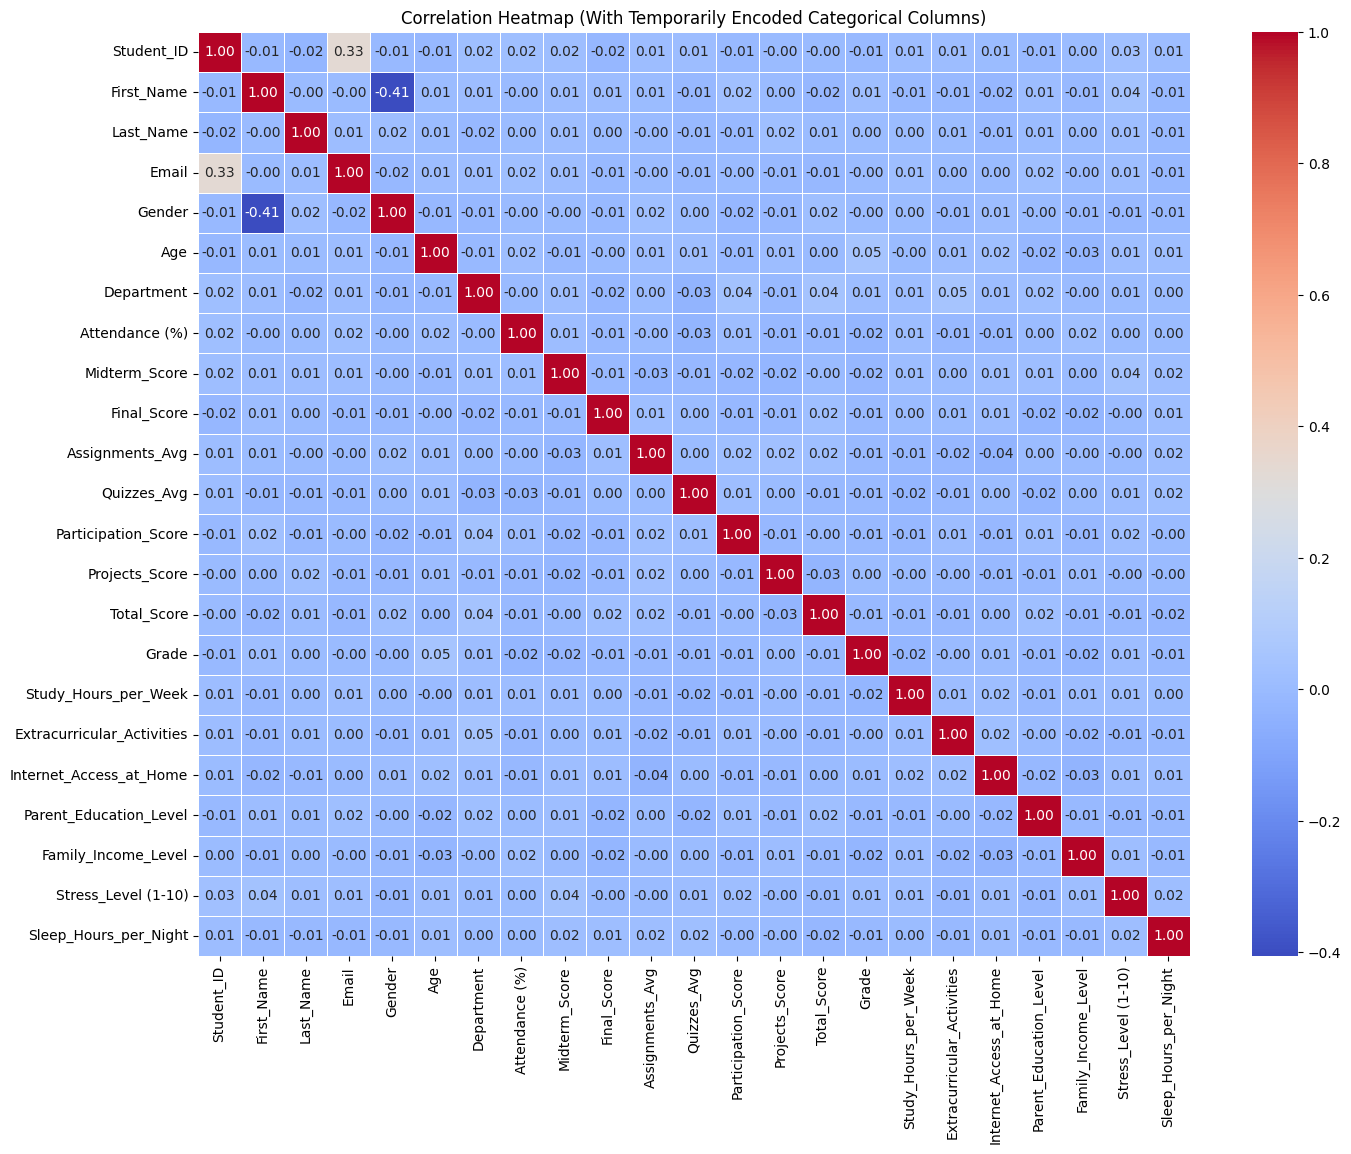

🔍 Top Correlated Column Pairs:
                      Feature 1                Feature 2  Correlation
27                   First_Name                   Gender    -0.405683
69                        Email               Student_ID     0.332444
350                       Grade                      Age     0.048244
397  Extracurricular_Activities               Department     0.046647
152                  Department              Total_Score     0.041485
424     Internet_Access_at_Home          Assignments_Avg    -0.037252
282         Participation_Score               Department     0.036783
484         Stress_Level (1-10)               First_Name     0.036642
205               Midterm_Score      Stress_Level (1-10)     0.035288
478         Family_Income_Level  Internet_Access_at_Home    -0.033732


In [26]:
# Copy original dataframe to avoid modifying it permanently
df_temp = df.copy()

# Apply Label Encoding only temporarily
label_encoders = {}
for col in df_temp.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df_temp[col] = le.fit_transform(df_temp[col])
    label_encoders[col] = le  # Store encoder for future reference

# Compute the correlation matrix
correlation_matrix = df_temp.corr()

# Plot heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap (With Temporarily Encoded Categorical Columns)")
plt.show()

# Find the top correlated column pairs
correlation_pairs = correlation_matrix.unstack().reset_index()
correlation_pairs.columns = ['Feature 1', 'Feature 2', 'Correlation']

# Remove self-correlations (correlation of a feature with itself)
correlation_pairs = correlation_pairs[correlation_pairs['Feature 1'] != correlation_pairs['Feature 2']]

# Sort by absolute correlation value in descending order
correlation_pairs = correlation_pairs.reindex(correlation_pairs['Correlation'].abs().sort_values(ascending=False).index)

# Drop duplicate pairs (since correlation is symmetric)
correlation_pairs = correlation_pairs.iloc[::2]

# Print the top correlated column pairs
print("🔍 Top Correlated Column Pairs:")
print(correlation_pairs.head(10))  # Adjust number to see more or fewer pairs

# Revert back to original categorical values
for col, le in label_encoders.items():
    df_temp[col] = le.inverse_transform(df_temp[col])

Unique grades in the dataset: ['C' 'F' 'A' 'D' 'B']


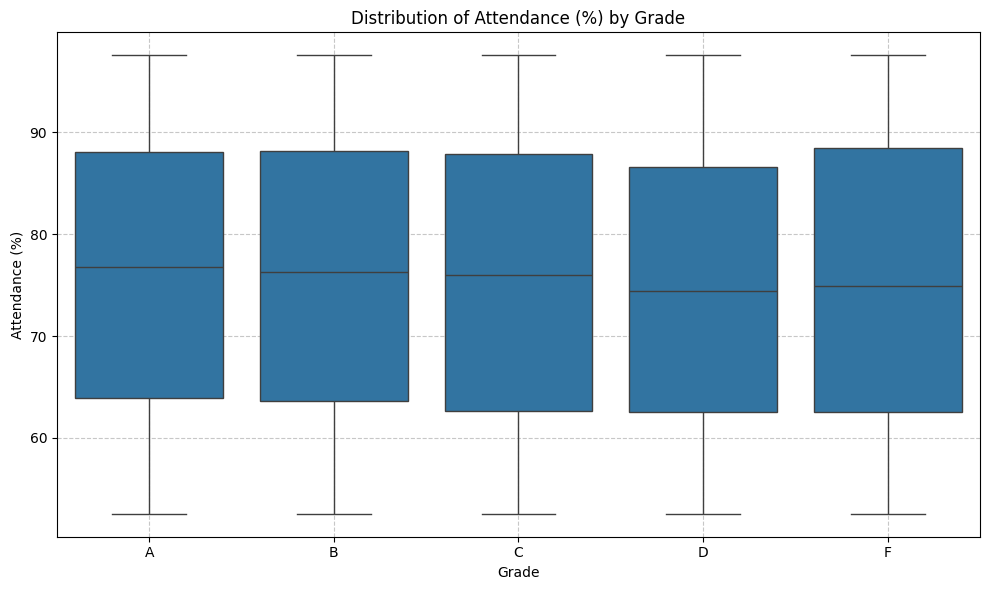


Average Attendance (%) by Grade:
Grade
A    75.918145
B    75.706133
C    75.303799
D    74.664969
F    75.190132
Name: Attendance (%), dtype: float64

Number of students in each grade:
Grade
A     997
B    1014
C     975
D    1011
F    1003
Name: count, dtype: int64


In [27]:
# Check unique grades
print("Unique grades in the dataset:", df['Grade'].unique())

# Create a box plot to see the distribution of attendance for each grade
plt.figure(figsize=(10, 6))
sns.boxplot(x='Grade', y='Attendance (%)', data=df.sort_values(by='Grade'))
plt.title('Distribution of Attendance (%) by Grade')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Calculate average attendance for each grade
grade_attendance_avg = df.groupby('Grade')['Attendance (%)'].mean().sort_index()
print("\nAverage Attendance (%) by Grade:")
print(grade_attendance_avg)

# Count number of students in each grade
grade_counts = df['Grade'].value_counts().sort_index()
print("\nNumber of students in each grade:")
print(grade_counts)